<a href="https://colab.research.google.com/github/Hasebul21/udemy-machine-learning/blob/main/outlier_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as ppt
import seaborn as sns

In [150]:
df = pd.read_csv('cgpa_placement_100_with_outliers (1).csv')
df.shape

(100, 3)

In [151]:
df['Placement_Marks'].describe()

,Placement_Marks
count,100.000000
mean,78.303995
std,42.754675
min,41.218432
25%,58.583268
50%,72.990457
75%,81.391082
max,343.027757


In [152]:
print(df['CGPA'].skew(), df['Placement_Marks'].skew())

-0.4822412091105637 4.797608381175007


**Check If placement marks contain outliers**

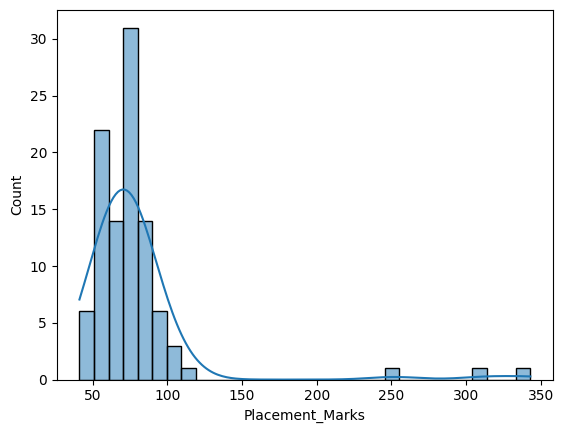

In [153]:
sns.histplot(df["Placement_Marks"], kde=True)
ppt.show()

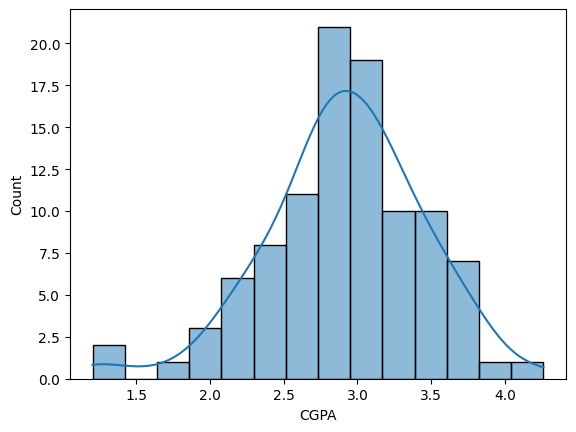

In [154]:
sns.histplot(df["CGPA"], kde=True)
ppt.show()

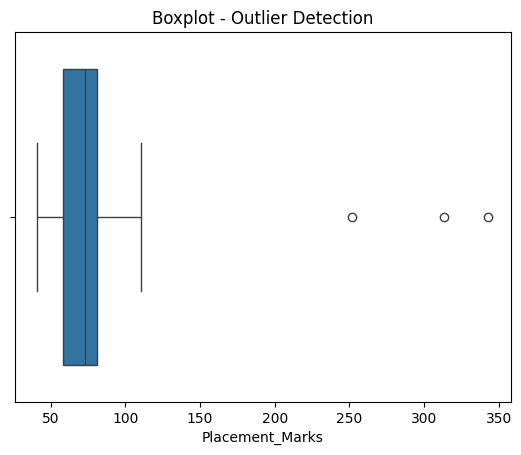

In [155]:
sns.boxplot(x=df["Placement_Marks"])
ppt.title("Boxplot - Outlier Detection")
ppt.show()

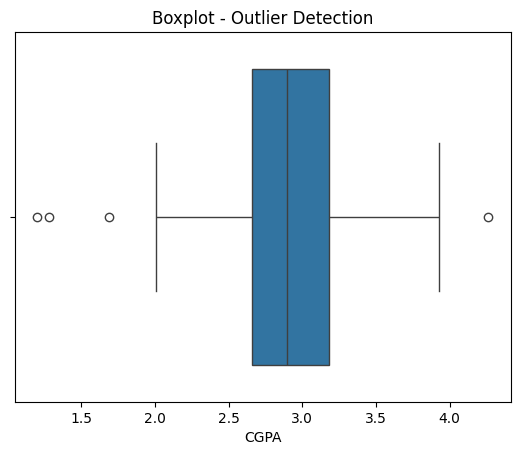

In [156]:
sns.boxplot(x=df["CGPA"])
ppt.title("Boxplot - Outlier Detection")
ppt.show()

**Since CGPA follows a normal distribution, the Z-Score method is appropriate for detecting outliers. On the other hand, Placement Marks are skewed, so the IQR method is more suitable for identifying outliers in that column.**

In [157]:
cgpa_lowest_outlier = df['CGPA'].mean() - 3 * df['CGPA'].std()
cgpa_highest_outlier = df['CGPA'].mean() + 3 * df['CGPA'].std()
print(cgpa_lowest_outlier, cgpa_highest_outlier)

1.3244414157376512 4.5031193951905895


In [158]:
percentage_marks_25 = df['Placement_Marks'].quantile(0.25)
percentage_marks_75 = df['Placement_Marks'].quantile(0.75)
iqr = percentage_marks_75 - percentage_marks_25
upper_limit = percentage_marks_75 + (1.5 * iqr)
lower_limit = percentage_marks_25 - (1.5 * iqr)

In [159]:
df['CGPA'] = np.where(
    df['CGPA'] > cgpa_highest_outlier,
    cgpa_highest_outlier,
    np.where(
        df['CGPA'] < cgpa_lowest_outlier,
        cgpa_lowest_outlier,
        df['CGPA']
    )
)

df['Placement_Marks'] = np.where (
    df['Placement_Marks'] > upper_limit,
    upper_limit,
    np.where(
        df['Placement_Marks'] < 0,
        lower_limit,
        df['Placement_Marks']
    )
)

In [160]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = df.drop('Placement', axis=1)
Y = df['Placement']
X = scaler.fit_transform(X)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

**ADD LINEAR REGRESSION**

In [161]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)


LogisticRegression()

In [162]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.58      0.92      0.71        12

    accuracy                           0.55        20
   macro avg       0.29      0.46      0.35        20
weighted avg       0.35      0.55      0.43        20

